## Context
In this notebook, we wrap the multi-metric analysis into methods so we can just pass in data and get out attributions. 

## Imports

In [1]:
from red_causal_analyzer import *
from causal_analyzer import CausalImpactAnalyzer

/Users/by-gc-ia/opt/anaconda3/envs/py-dowhy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Workspace

### Specify data paths

In [2]:
data_dir = "simulated_multimetric_data"
normal_data_path = f"{data_dir}/normal_data.csv"
outlier_data_path = f"{data_dir}/anomalous_data.csv"
causal_graph_path = f"{data_dir}/causal_graph.json"
target_node_path = f"{data_dir}/target_node.txt"

### Run analysis

In [3]:
def load_data(normal_data_path, outlier_data_path, causal_graph_path, target_node_path):
    normal_data = pd.read_csv(normal_data_path)
    outlier_data = pd.read_csv(outlier_data_path)
    with open(causal_graph_path, 'r') as f:
        causal_graph = nx.node_link_graph(json.load(f))
    with open(target_node_path, 'r') as f:
        target_node = f.read().strip()
    return normal_data, outlier_data, causal_graph, target_node

In [4]:
# Load data of interest
normal_data, outlier_data, causal_graph, target_node = load_data(normal_data_path, 
                                                                outlier_data_path, 
                                                                causal_graph_path, 
                                                                target_node_path)

/Users/by-gc-ia/opt/anaconda3/envs/py-dowhy/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Estimating Shapley Values. Average change of Shapley values in run 540 (2700 evaluated permutations): 1.0921203403409285%: 100%|██████████| 1/1 [00:07<00:00,  7.22s/it]
Estimating Shapley Values. Average change of Shapley values in run 91 (455 evaluated permutations): 2.066147794660825%: 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]
Estimating bootstrap interval...: 100%|██████████| 2/2 [00:12<00:00,  6.21s/it]
Estimating Shapley Values. Average change of Shapley values in run 250 (1250 evaluated permutations): 0.6743189578247468%: 100%|██████████| 1/1 [00:07<00:00,  7.32s/it]
Estimating Shapley Values. Average change of Shapley values in run 170 (850 evaluated permutations): 1.9447320737733265%: 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]
Estimating bootstrap interval...: 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]


Plotting attributions for error_rate


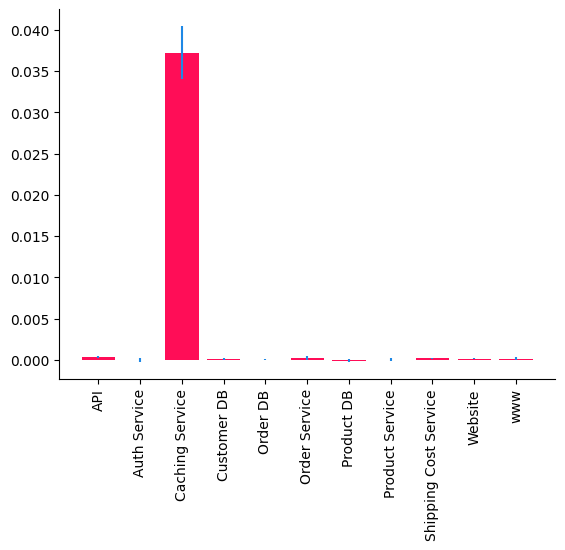

Percent contributions for error_rate: {'percent_contrib': {'Caching Service': 96.78213108633173}}
Plotting attributions for duration


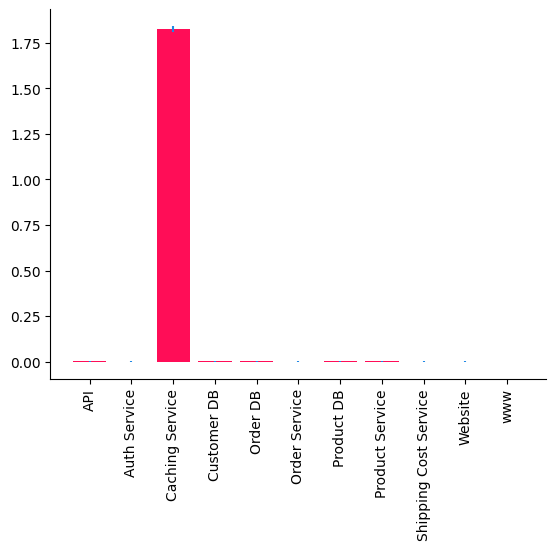

Percent contributions for duration: {'percent_contrib': {'Caching Service': 99.56417166906608}}


In [5]:
# Let's analyze the causal impact assuming our causal graph only considers the individual metrics on their own.
output = analyze_per_metric(causal_graph, normal_data, outlier_data, target_node, display_results = True)

Estimating Shapley Values. Average change of Shapley values in run 458 (2290 evaluated permutations): 1.3057430565860677%: 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]
Estimating Shapley Values. Average change of Shapley values in run 389 (1945 evaluated permutations): 1.4451535819087173%: 100%|██████████| 1/1 [00:07<00:00,  7.54s/it]
Estimating Shapley Values. Average change of Shapley values in run 582 (2910 evaluated permutations): 0.8252183889944703%: 100%|██████████| 1/1 [00:08<00:00,  8.63s/it]
Estimating Shapley Values. Average change of Shapley values in run 159 (795 evaluated permutations): 0.5439196197864139%: 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]
Estimating bootstrap interval...: 100%|██████████| 4/4 [00:32<00:00,  8.24s/it]


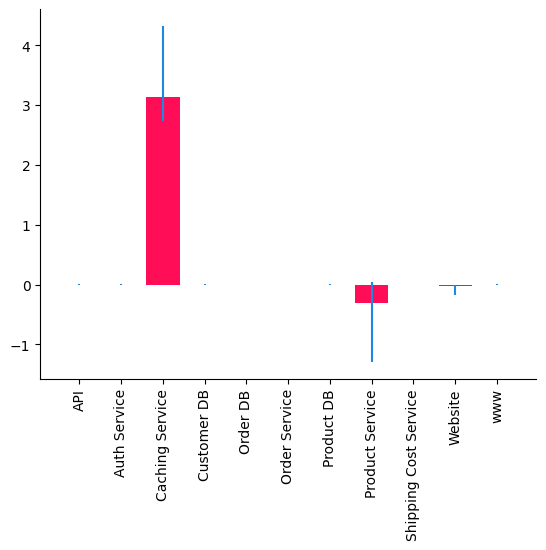

In [7]:
# We can also analyze it by first calculating anomaly scores across metrics, aggregating them, and doing analysis on the aggregated scores
output = analyze_with_aggregated_anomaly_scores(causal_graph, normal_data, outlier_data, target_node, display_results = True)